# Single Photon Counting Test

## Imports

In [1]:
import h5py
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import timeit

In [2]:
import pycentroids as centroids

In [3]:
help(centroids.find_photons)

Help on built-in function find_photons in module pycentroids:

find_photons(...) method of builtins.PyCapsule instance
    find_photons(images: numpy.ndarray[uint16], threshold: int=200, box: int=2, pixel_photon: int=10, overlap_max: int=0, sum_min: float=800, sum_max: float=1250) -> tuple
    
    Find photons



## Load test data

In [4]:
!test -f image040.h5 || curl -o image040.h5 https://centroids-data.s3.amazonaws.com/images.h5

In [5]:
data = np.asarray(h5py.File('images.h5', 'r')['data'])

In [6]:
data.shape

(40, 1612, 3304)

## Call the fast code for single photon counting

In [7]:
timeit.timeit("centroids.find_photons(data, 400, 2)", globals=globals(), number=1)

0.21284774306695908

In [8]:
table, out = centroids.find_photons(data, 400, 2)

In [9]:
df = pd.DataFrame(table)

In [10]:
table.shape

(862, 15)

In [11]:
out.shape

(40, 1612, 3304)

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,619.0,866.0,619.214090,865.863346,619.212667,865.862500,1097.666667,160.733333,0.0,619.122255,865.694025,5.069328,242.733368,0.336857,11.830988
1,216.0,872.0,216.055261,872.041864,216.055000,872.040333,1194.333333,157.266667,0.0,216.116087,872.090690,3.623877,275.934102,0.216958,7.459678
2,514.0,872.0,514.054229,872.531633,514.053167,872.529833,1032.666667,158.733333,0.0,513.959938,872.454784,2.609149,241.859600,0.416528,14.014913
3,557.0,872.0,556.888181,872.429118,556.888167,872.429000,1046.333333,158.866667,0.0,556.778337,872.431513,0.076924,261.129801,0.550704,19.525550
4,672.0,872.0,672.156154,872.423454,672.155833,872.421667,1088.666667,159.733333,0.0,672.110202,872.417287,3.085350,252.883263,0.403883,9.732001
5,459.0,873.0,458.890335,872.632900,458.890000,872.631500,1076.000000,156.600000,0.0,458.836868,872.744571,2.967371,250.453972,0.435882,15.598603
6,470.0,873.0,470.541635,872.751325,470.540833,872.750667,880.666667,157.933333,0.0,470.497155,872.594015,3.734584,196.825519,0.132094,6.552504
7,592.0,873.0,592.514140,872.834412,592.513333,872.833167,978.333333,161.066667,0.0,592.403372,872.979436,7.323438,198.811848,0.349290,15.334506
8,706.0,873.0,705.961460,872.611562,705.959667,872.611333,986.000000,160.800000,0.0,705.852315,872.736819,3.849585,222.440389,0.471093,15.500408
9,716.0,873.0,716.022247,872.668521,716.022000,872.668167,899.000000,159.800000,0.0,715.903819,872.644830,2.246458,210.711635,0.499082,9.166357


## Plot the results 
### Whole image

In [13]:
#dfa = df[(df[13] > 0.3)]
#dfb = dfa[(dfa[13] < 0.5)]
dfb = df

<IPython.core.display.Javascript object>


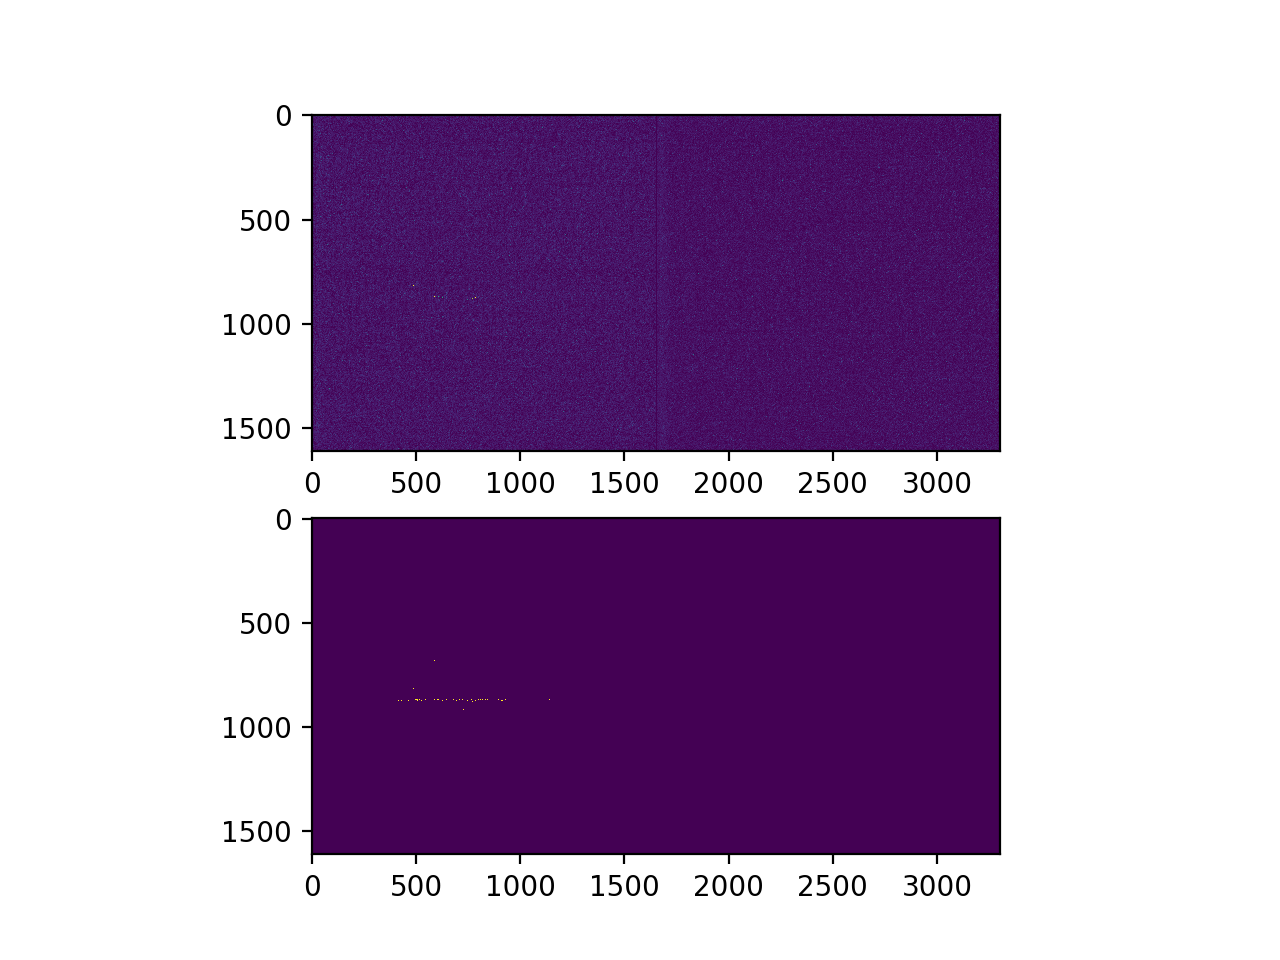

In [14]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(data[-1], vmin=150, vmax=300)
ax[1].imshow(out[-1]>0)

## Selected part of the image

<IPython.core.display.Javascript object>


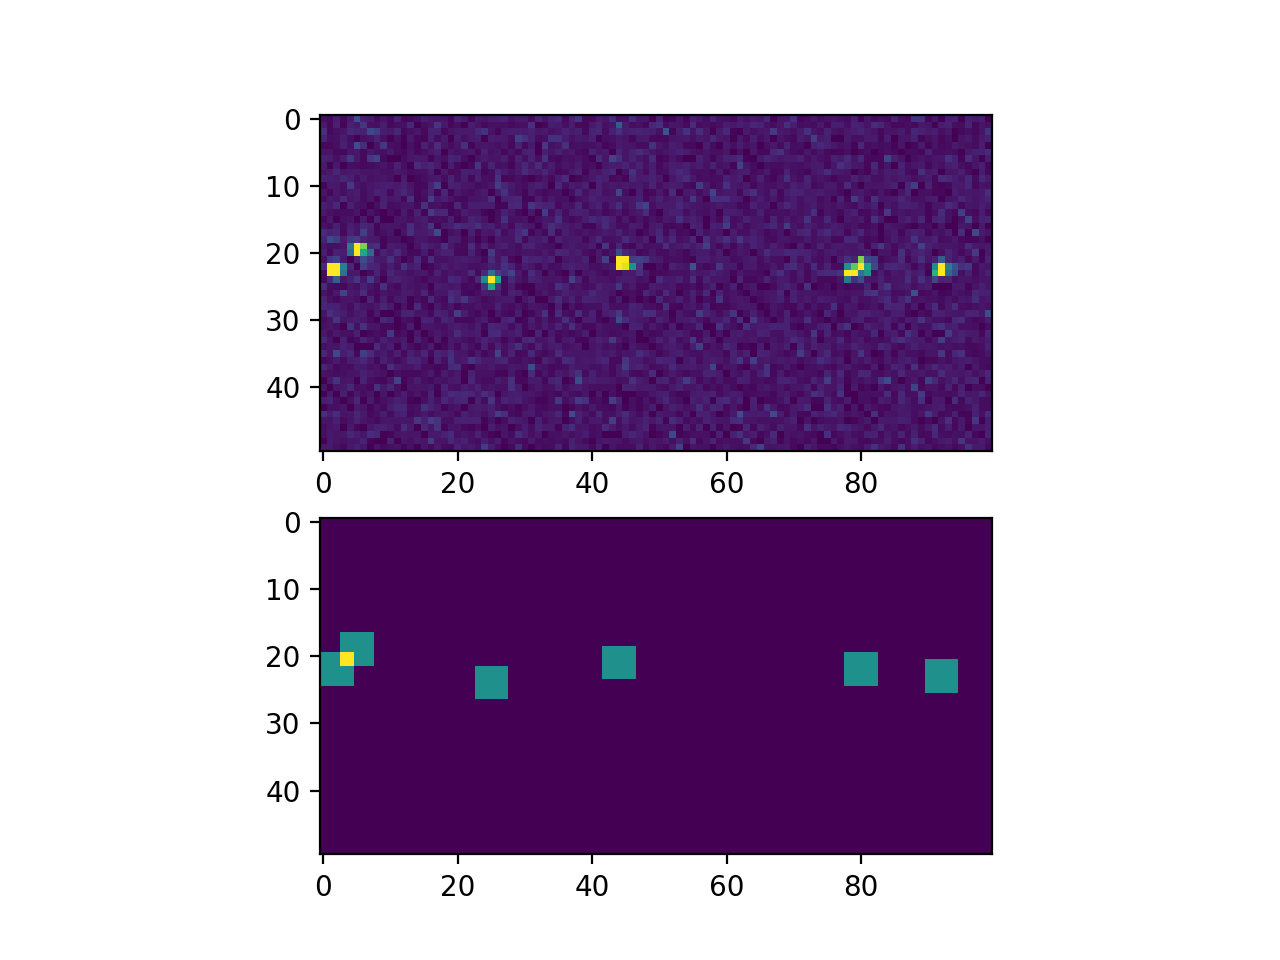

In [15]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(data[-1,850:900,600:700], vmin=150, vmax=300)
ax[1].imshow(out[-1,850:900,600:700] & 0xFF)

<IPython.core.display.Javascript object>


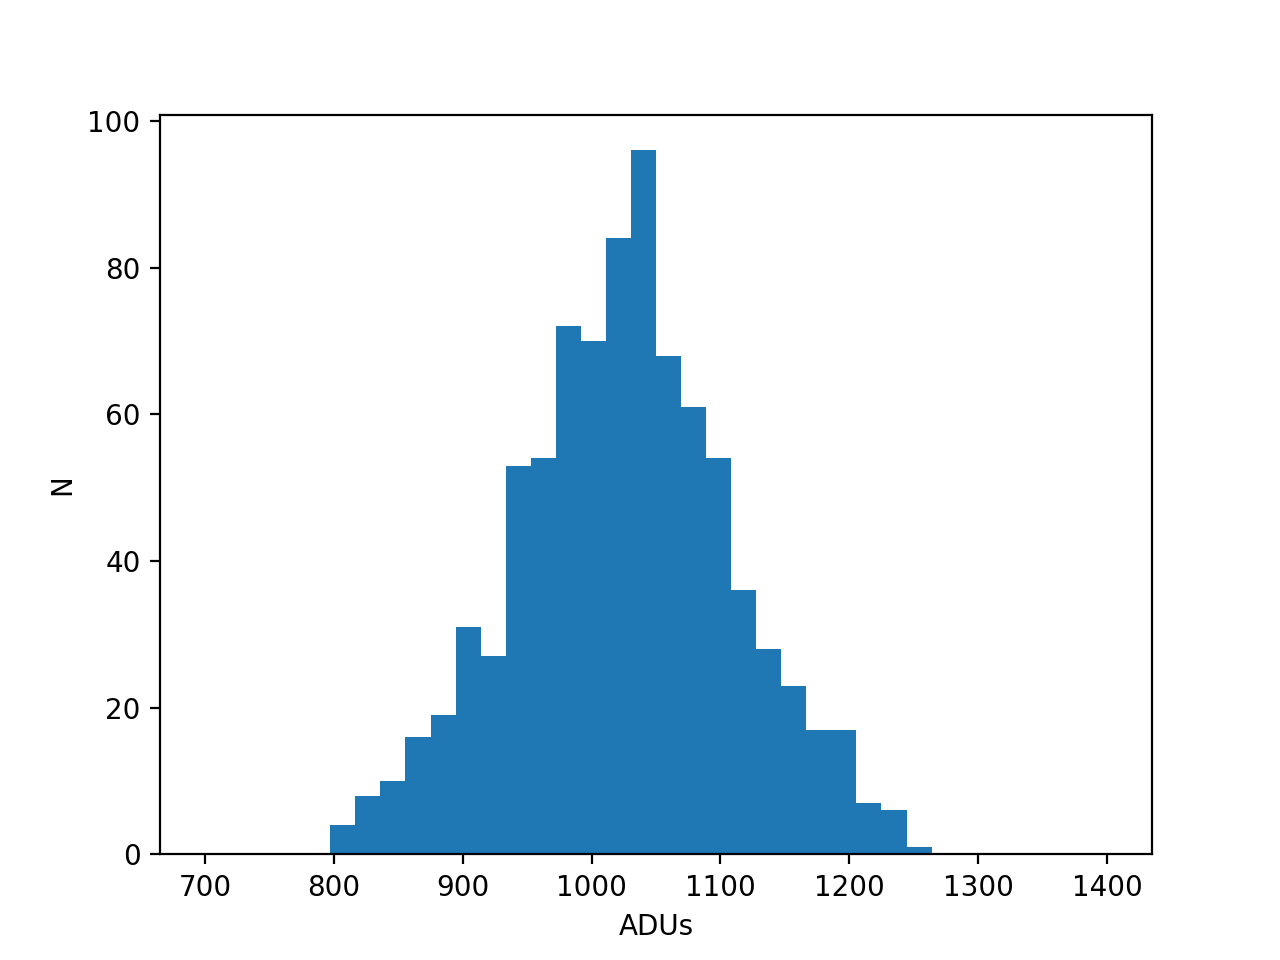

Text(0.5, 0, 'ADUs')

In [16]:
fig, ax = plt.subplots(1,1)
ax.hist(table[:,6], bins=36, range=(700, 1400))
ax.set_ylabel('N')
ax.set_xlabel('ADUs')

<IPython.core.display.Javascript object>


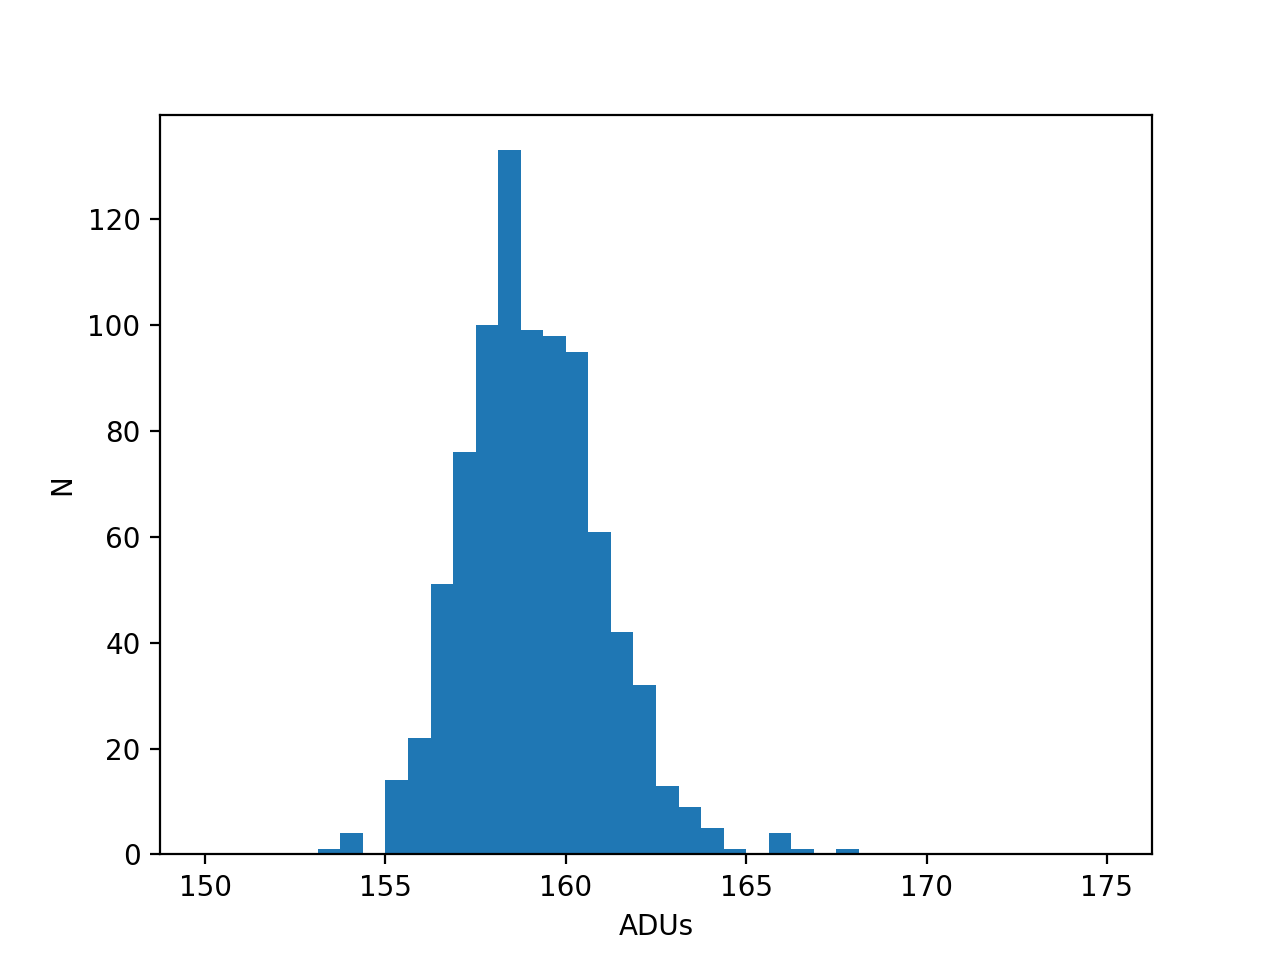

Text(0.5, 0, 'ADUs')

In [17]:
fig, ax = plt.subplots(1,1)
ax.hist(table[:,7], bins=40, range=(150,175))
ax.set_ylabel('N')
ax.set_xlabel('ADUs')

In [18]:
xfrac = dfb[2] - np.asarray(dfb[2], dtype=int)
yfrac = dfb[3] - np.asarray(dfb[3], dtype=int)
xfrac_fit = dfb[9] - np.asarray(dfb[9], dtype=int)
yfrac_fit = dfb[10] - np.asarray(dfb[10], dtype=int)

<IPython.core.display.Javascript object>


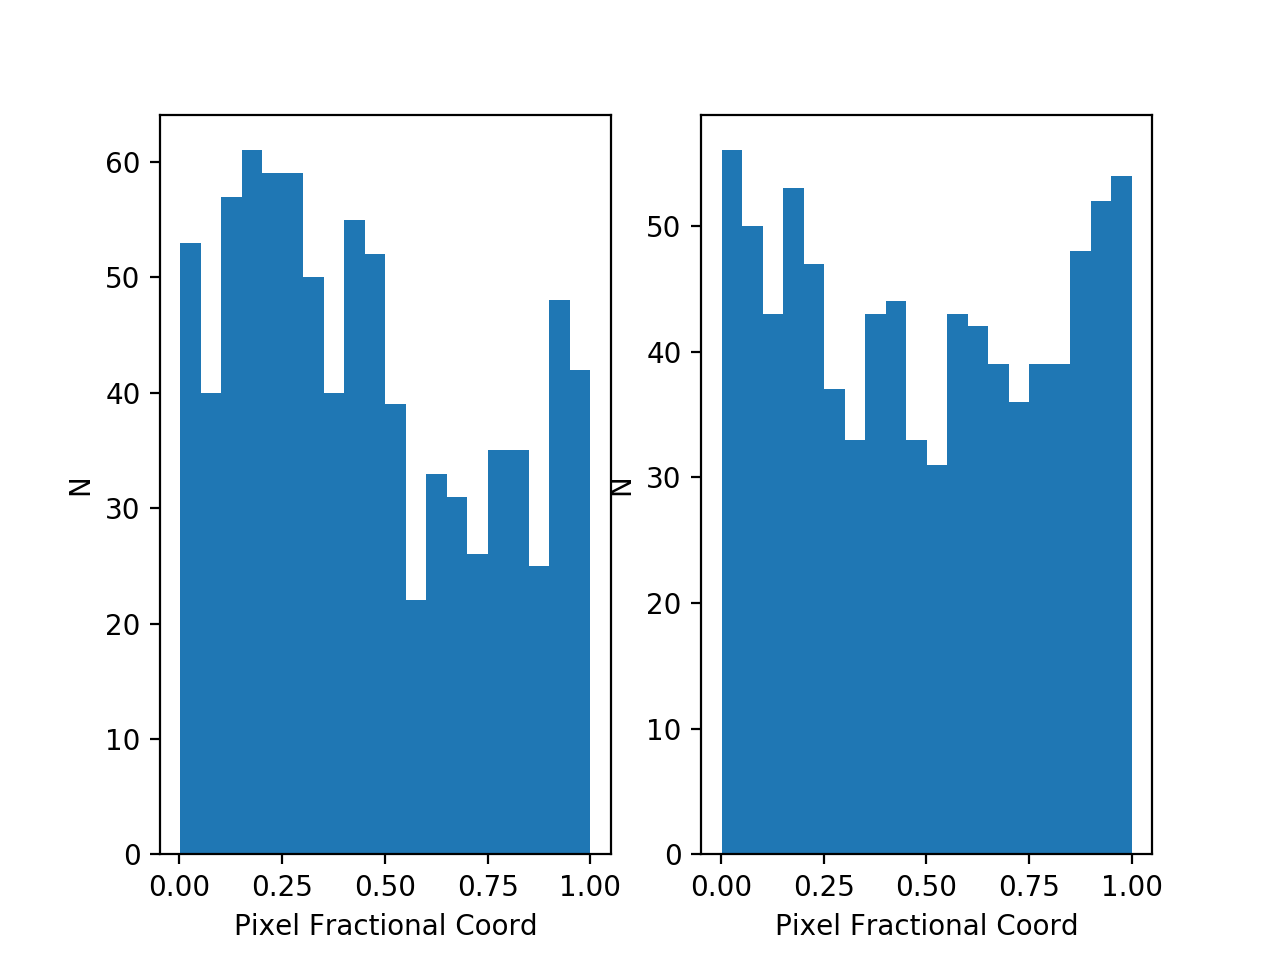

Text(0.5, 0, 'Pixel Fractional Coord')

In [19]:
fig, ax = plt.subplots(1,2)
ax[0].hist(xfrac_fit, bins=20)
ax[1].hist(yfrac_fit, bins=20)
ax[0].set_ylabel('N')
ax[0].set_xlabel('Pixel Fractional Coord')
ax[1].set_ylabel('N')
ax[1].set_xlabel('Pixel Fractional Coord')

<IPython.core.display.Javascript object>


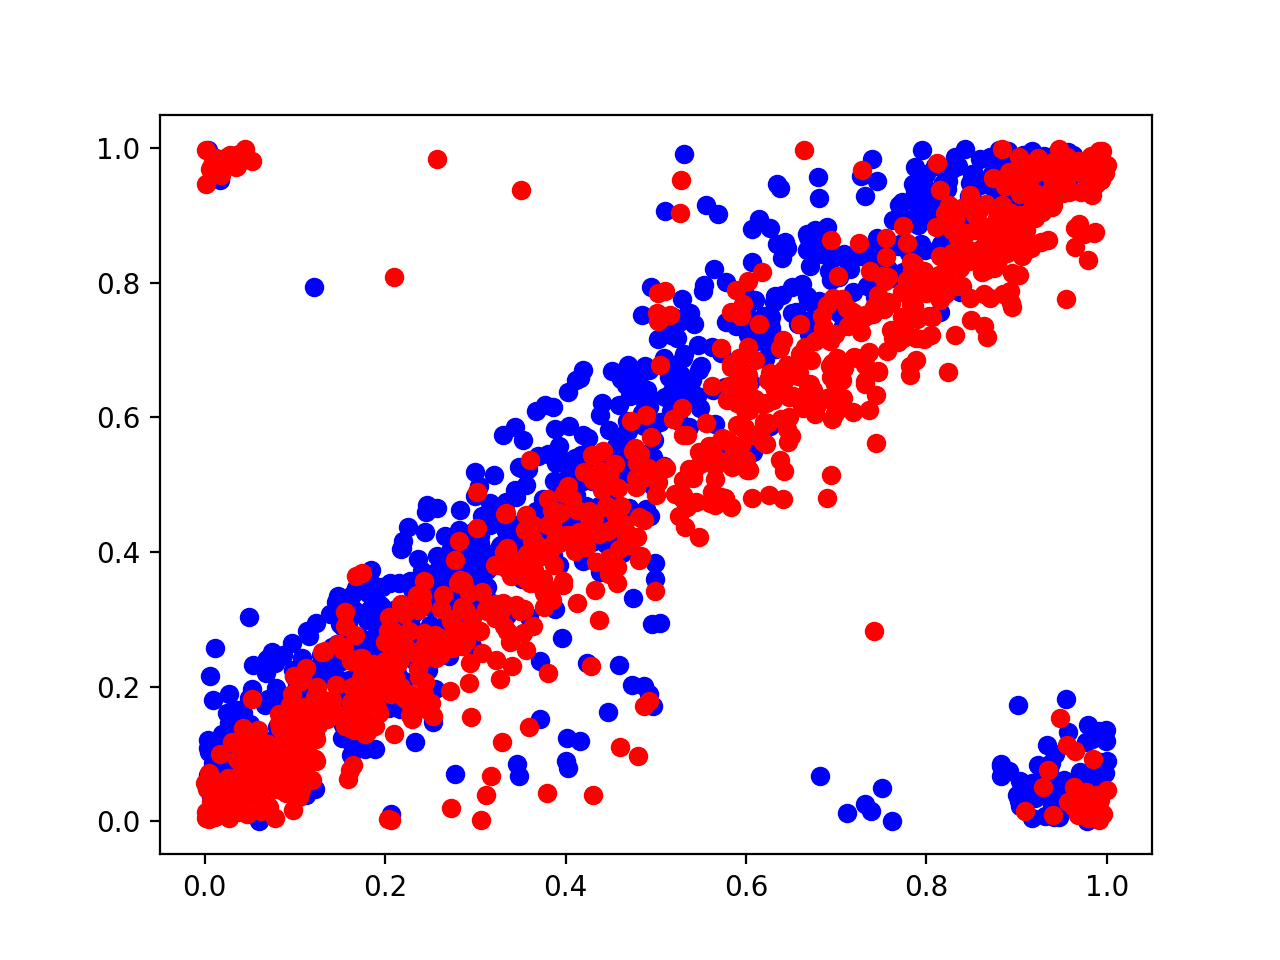

In [20]:
fig, ax = plt.subplots(1,1)
ax.plot(xfrac_fit, xfrac, 'bo')
ax.plot(yfrac_fit, yfrac, 'ro')

<IPython.core.display.Javascript object>


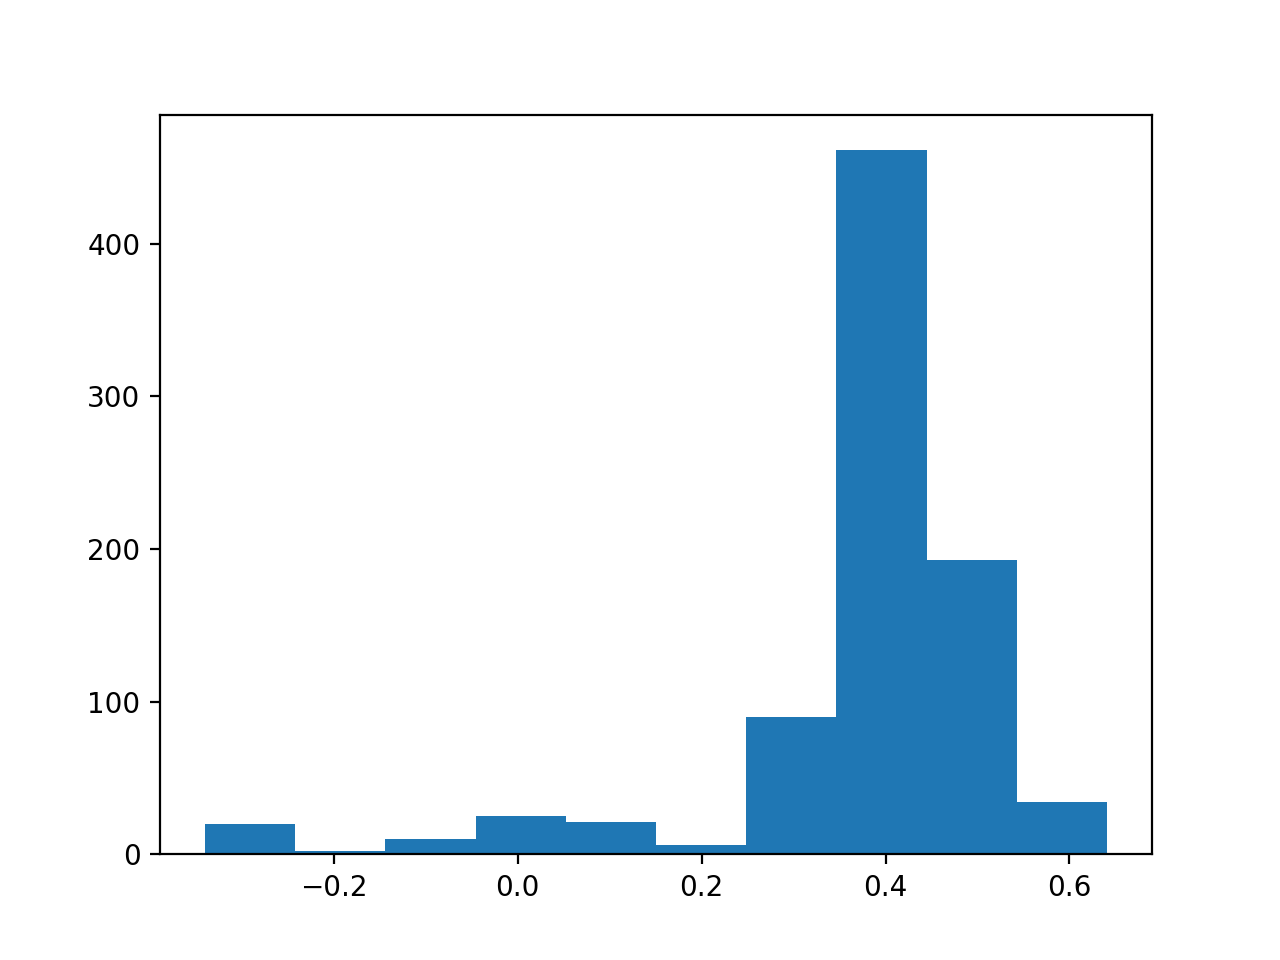

(array([ 20.,   2.,  10.,  25.,  21.,   6.,  90., 461., 193.,  34.]),
 array([-0.34007146, -0.24199536, -0.14391927, -0.04584317,  0.05223292,
         0.15030902,  0.24838512,  0.34646121,  0.44453731,  0.5426134 ,
         0.6406895 ]),
 <a list of 10 Patch objects>)

In [21]:
fig, ax = plt.subplots(1,1)
ax.hist(dfb[13], bins=10)

In [22]:
centroids.__version__

'v0.1-38-g430b0fe+'